In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import umap

/home/jieun201/.local/lib/python3.9/site-packages/numba/core/cpu.py:97: UserWarning: Numba extension module 'awkward.numba' failed to load due to 'AttributeError(module 'awkward.numba' has no attribute '_register')'.
  numba.core.entrypoints.init_all()
2023-08-07 20:58:26.252495: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 20:58:26.289747: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 20:58:26.290836: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 20:58:27.102402: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
df1 = pd.read_csv('/home/jieun201/july31_autoencoder/notAnomaly.csv')
df1.drop('predict',inplace=True,axis=1)
df1['predict']=1

In [4]:
df2 = pd.read_csv('/home/jieun201/july31_autoencoder/Anomaly.csv')
df2.drop('predict',inplace=True,axis=1)
df2['predict']=0
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local,predict
0,1719.0,1565.0,756.0,1112.0,864.0,831.0,661.0,1822.0,1442.0,1053.0,1384.0,1079.0,710.0,-2.424580,0
1,0.0,0.0,0.0,0.0,4548.0,17326.0,11053.0,15466.0,5654.0,0.0,0.0,0.0,0.0,-3.202990,0
2,0.0,0.0,20.0,20054.0,10420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.450000,0
3,2749.0,985.0,1645.0,977.0,1333.0,630.0,806.0,1099.0,1062.0,1274.0,438.0,0.0,0.0,-6.502660,0
4,0.0,0.0,0.0,0.0,2513.0,10756.0,11547.0,8273.0,3110.0,0.0,0.0,0.0,0.0,-7.419960,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.0,0.0,311.0,3209.0,2591.0,1210.0,1990.0,1555.0,16964.0,2592.0,0.0,0.0,0.0,-2.647950,0
951,2940.0,2719.0,923.0,691.0,1834.0,1290.0,1210.0,681.0,1001.0,1155.0,6.0,0.0,0.0,-6.123670,0
952,1788.0,946.0,1049.0,1115.0,1578.0,1012.0,1195.0,1228.0,1764.0,1383.0,727.0,848.0,1194.0,-7.458150,0
953,0.0,0.0,0.0,0.0,163.0,41375.0,12083.0,0.0,0.0,0.0,0.0,0.0,0.0,4.550000,0


In [5]:
concat2 = pd.concat([df1,df2],join='inner')
concat2

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local,predict
0,0.0,0.0,0.0,0.0,7.0,4932.0,4008.0,0.0,0.0,0.0,0.0,0.0,0.0,3.450000,1
1,0.0,0.0,0.0,0.0,5317.0,3463.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,2.921260,1
2,0.0,0.0,0.0,3251.0,6686.0,509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.378940,1
3,0.0,0.0,0.0,0.0,1227.0,6616.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.050000,1
4,0.0,0.0,0.0,649.0,12946.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.0,0.0,311.0,3209.0,2591.0,1210.0,1990.0,1555.0,16964.0,2592.0,0.0,0.0,0.0,-2.647950,0
951,2940.0,2719.0,923.0,691.0,1834.0,1290.0,1210.0,681.0,1001.0,1155.0,6.0,0.0,0.0,-6.123670,0
952,1788.0,946.0,1049.0,1115.0,1578.0,1012.0,1195.0,1228.0,1764.0,1383.0,727.0,848.0,1194.0,-7.458150,0
953,0.0,0.0,0.0,0.0,163.0,41375.0,12083.0,0.0,0.0,0.0,0.0,0.0,0.0,4.550000,0


In [6]:
subset = concat2.iloc[:,0:14]
scaled_data = StandardScaler().fit_transform(subset.values)
len(scaled_data)

from umap.parametric_umap import ParametricUMAP
embedder = ParametricUMAP(n_training_epochs=5)
embedding = embedder.fit_transform(scaled_data)

/home/jieun201/.local/lib/python3.9/site-packages/umap/parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(
2023-08-07 20:58:36.992830: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-07 20:58:36.993810: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50


2023-08-07 20:59:02.990372: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [30837380]
	 [[{{node Placeholder/_0}}]]
2023-08-07 20:59:02.990734: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [30837380]
	 [[{{node Placeholder/_0}}]]
2023-08-07 20:59:03.504154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim

3083/3083 [==============================] - 20s 6ms/step - loss: 0.1330
Epoch 2/50
3083/3083 [==============================] - 18s 6ms/step - loss: 0.1090
Epoch 3/50
3083/3083 [==============================] - 18s 6ms/step - loss: 0.1038
Epoch 4/50
3083/3083 [==============================] - 18s 6ms/step - loss: 0.1013
Epoch 5/50
3083/3083 [==============================] - 19s 6ms/step - loss: 0.0994
Epoch 6/50
3083/3083 [==============================] - 19s 6ms/step - loss: 0.0980
Epoch 7/50
3083/3083 [==============================] - 18s 6ms/step - loss: 0.0969
Epoch 8/50
3083/3083 [==============================] - 19s 6ms/step - loss: 0.0960
Epoch 9/50
3083/3083 [==============================] - 19s 6ms/step - loss: 0.0953
Epoch 10/50
3083/3083 [==============================] - 19s 6ms/step - loss: 0.0954
Epoch 11/50
3083/3083 [==============================] - 19s 6ms/step - loss: 0.0944
Epoch 12/50
3083/3083 [==============================] - 19s 6ms/step - loss: 0.0943


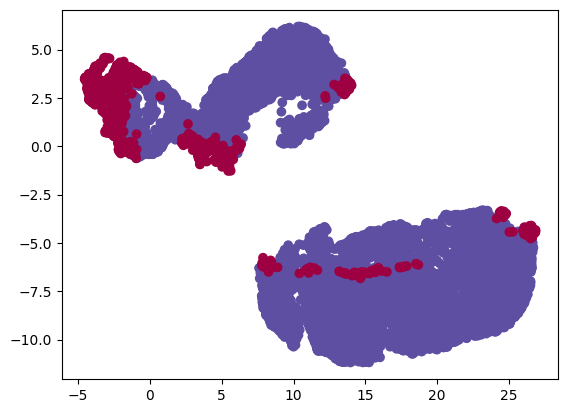

In [7]:
plt.scatter(embedding.T[0], embedding.T[1], c=concat2['predict'].values, cmap='Spectral')


In [ ]:
#plane_mapper = umap.UMAP(random_state=42).fit(scaled_data)

In [ ]:
#plt.scatter(embedding.T[0], embedding.T[1], c=df_Low['ptLabel'].values, cmap='Spectral')

In [ ]:
clusterable_embedding = umap.UMAP(
    n_neighbors=50,
    min_dist=0.0,
    n_components=20,
    random_state=42,
).fit_transform(scaled_data)

In [ ]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=concat2['predict'].values, s=0.1, cmap='Spectral');

In [8]:
hyperbolic_mapper = umap.UMAP(output_metric='hyperboloid',
                              random_state=42).fit(scaled_data)

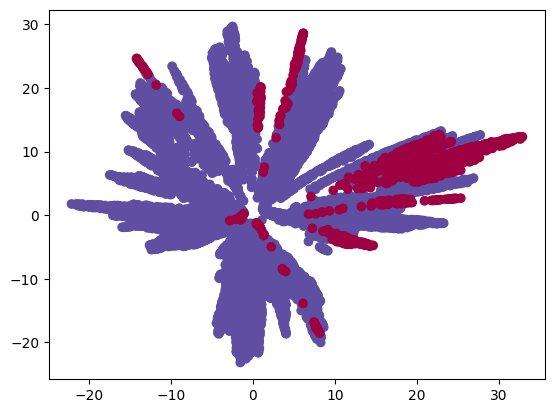

In [9]:
plt.scatter(hyperbolic_mapper.embedding_.T[0],
            hyperbolic_mapper.embedding_.T[1],c=concat2['predict'].values,
             cmap='Spectral')

In [10]:
sphere_mapper = umap.UMAP(output_metric='haversine', random_state=42).fit(scaled_data)

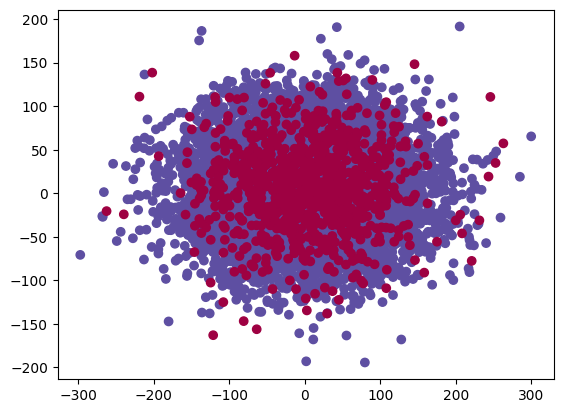

In [11]:
plt.scatter(sphere_mapper.embedding_.T[0], sphere_mapper.embedding_.T[1], c=concat2['predict'].values, cmap='Spectral')


In [12]:
import numpy as np
x = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
y = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
z = np.cos(sphere_mapper.embedding_[:, 0])

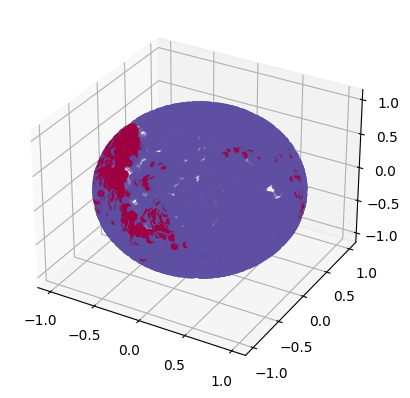

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=concat2['predict'], cmap='Spectral')

In [14]:
x = np.arctan2(x, y)
y = -np.arccos(z)

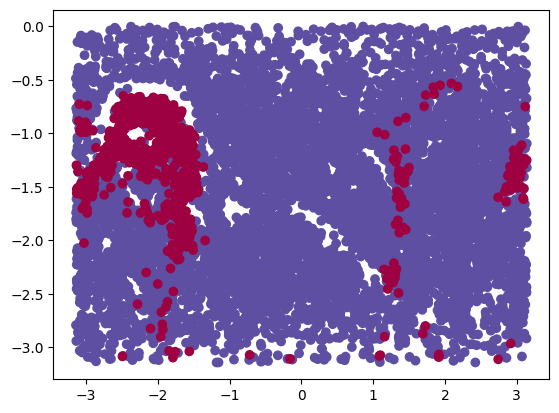

In [15]:
plt.scatter(x, y, c=concat2['predict'].values.astype(np.int32), cmap='Spectral')